# Fermion Pair-production: $e^- e^+ \rightarrow \gamma \rightarrow f \bar{f}$

Perform a semi-automatic calculation of the fermion pair production process. The program is somewhat complicated, but once the procedure is clear it can easily be adapted to other processes. 

The following steps are done in the calculation
- enter the Feynman rules for the process in the function `meg``
- spin averaged matrix element
- $d\sigma/d\Omega$
- total cross section from $d\sigma/d\Omega$
- $d\sigma/dt$
- total cross section from $d\sigma/dt$
- make some plots
- compare this calculation with the formula in the book
- show that $d\sigma/dt$ with masses can be expressed in a similar way as the massless formula 


### Procedure:
- function `meg` calculates the matrix element for $\gamma$ exchange
- function: `mel2sum` calculates the squared spin summed matrix element. With a print flag
             one can display the amplitude for each helicity combination. 

Parameters:
- E: energy of $e^-$ and $e^+$ in the cms-system
- s: Mandelstam s
- m: electron mass
- M: fermion mass
- alpha: fine structure constant

In [1]:
import sympy as sy
import sympy.physics.matrices as sypm
import heppackv0 as h
import itertools as it
import utsm_sy as utsm
from matplotlib import style
style.use('ggplot') # use a fancies plot style

Reading heppackv0.py (March 2023)

Done


----
# Functions

In [2]:
def to_cos(expr,sth, sct, rep=True):
    """
    Convert trig functions to cos(sth). Valid for 0<= sth <= pi:

    Input:
    expr : sympy expression with trig functions
    sth  : symbol for angle theta
    sct  : symbol for cos(theta)
    rep  : True:  replace cos(sth) by sct
           False: leave cos(theta)

    Usage:
    th,ct = sy.symbols("theta,c_theta", real=True)
    expr = sy.sin(th/2)**4
    to_cos(expr,th,ct)

    Result:
    rep = True: (ct-1)**2/4
    rep = False: (cos(th)-1)**2/

    """
    r = expr.subs(sy.tan(sth/2), sy.sin(sth/2)/sy.cos(sth/2))
    r = r.subs(sy.sin(sth/2)**2, (1-sy.cos(sth))/2)
    r = r.subs(sy.cos(sth/2)**2, (1+sy.cos(sth))/2)
    r = r.subs(sy.cos(2*sth)   , 2*sy.cos(sth)**2-1)
    r = r.subs(sy.sin(sth)**2  , 1-sy.cos(sth)**2)
    r = r.subs(sy.sin(sth)     , sy.sqrt(1-sy.cos(sth)**2))
    if rep:
        r = r.subs(sy.cos(sth),sct)
        r = r.subs(sth,sy.acos(sct))
        return sy.simplify(r)
    else:
        r = sy.simplify(r)
        return r

In [3]:
def get_mandelstam(ppe,ppE, ppf, ppF):
    # calculate Mandelstam variables S,T,U from list of particle properties
    def add4(v1,v2):
        return [ v1[i]+ v2[i] for i in range(4)]
    def sub4(v1,v2):
        return [ v1[i]- v2[i] for i in range(4)]
    
    v1 = h.fourvec(ppe)
    v2 = h.fourvec(ppE)
    v3 = h.fourvec(ppf)
    v4 = h.fourvec(ppF)
    S = h.dotprod4( add4(v1,v2), add4(v1,v2))
    T = h.dotprod4( sub4(v1,v3), sub4(v1,v3))
    U = h.dotprod4( sub4(v1,v4), sub4(v1,v4))

    return S, T, U

In [4]:
def tmandel(ss,st,sct,sm1,sm2,sm3,sm4):
    """
    Calculate the substitution needed to convert a sympy expression 
    which was prepared with the function to_cos() 
    such that all cos(theta) terms are replaced by the Mandelstam t variable

    Input:
    ss: symbol s-mandelstam
    st: symbol t-mandelstam
    sct: symbol sct=cos(th)
    sm1, sm2, sm3, sm4: masses

    Return:
    rst: t-mandelstam t=f(s,ct,m1,m2,m3,m4)
    sdtdct: dt/dcos(theta)
    subs_ct : ct = f(t), use subs(ct, subs_ct) to replace cos(theta) to t
    """
    a  = sm1**4 - 2*sm1**2*sm2**2 + sm2**4 + ss*(-2*sm1**2 - 2*sm2**2 + ss)
    b  = sm3**4 - 2*sm3**2*sm4**2 + sm4**4 + ss*(-2*sm3**2 - 2*sm4**2 + ss)
    sa = sy.sqrt(a/ss)
    sb = sy.sqrt(b/ss)
    sdtdct = sy.Rational(1,2)*sa*sb
    #
    A = -sm1**2*sm3**2 + sm1**2*sm4**2 + sm2**2*sm3**2 - sm2**2*sm4**2
    B = sm1**2 + sm2**2 + sm3**2 + sm4**2 - ss
    rst =  (A + ss*(sct*sa*sb+B))/(2*ss)
    # subs_ct
    subs_ct = ss*sa*sb*(-A+ss*(-B+2*st))/(a*b)
    return rst, sdtdct, subs_ct

----

# Calculate Feynman rules

In [5]:
#sy.init_printing(use_unicode=True)
s,E,alpha,sqrts = sy.symbols("s,E,alpha, sqrts", positive=True)
m,M = sy.symbols("m,M",nonnegative=True)
Qf = sy.symbols("Q_f",real=True)
theta,phi,sct,t,u = sy.symbols("theta, phi, c_theta, t, u",real=True)

In [6]:
# [E,m,th,ph] : list of particle properties 
#m=0 # set m=0 for massless calculation
#M=0
ppe = [E,m,0,0] # e-
ppE = [E,m,sy.pi,sy.pi] # e+
ppf = [E,M,theta,0] # f
ppF = [E,M,sy.pi-theta,sy.pi] # fbar

In [7]:
S,T,U = get_mandelstam(ppe,ppE, ppf, ppF)
display("S: ",S)
display("T: ",T)
display("U: ",U)

'S: '

'T: '

'U: '

'Flux: '

'fac_dsdo: '

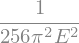

'fac_dsdt: '

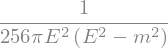

'Kinetic: '

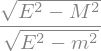

In [8]:
# see appendix A.2 for related formulae in the book
# Calculate flux, kinetic and pre-factors for cms system with 
# In general Flux = 2*S12
# S12 = sy.sqrt((s-(m1+m2)**2) *  (s-(m1-m2)**2))
Sij = lambda s,mi,mj: sy.sqrt((s-(mi+mj)**2) *  (s-(mi-mj)**2))
S12 = Sij(4*E*E, m, m)
Flux = 2*S12
Flux = sy.simplify(Flux)
display("Flux: ",Flux)

# permutation factor for equal final state
Permutation = 1

# prefactor for dsigma/dOmega in cms: fac_dsdo = 1(64 * pi**2 * s)
fac_dsdo = Permutation/(64 * sy.pi**2 * 4*E*E ); 
display("fac_dsdo: ",fac_dsdo)

# prefactor for dsigma/dt: fac_dsdt = 16 * pi * S12**2
fac_dsdt = sy.simplify(Permutation/(16 * sy.pi * S12**2 ))
display("fac_dsdt: ",fac_dsdt)

# Calculate kinetic factor K = p3/p1 for pairproduction
# in general K = S34/S12
S12 = sy.sqrt((s-(m+m)**2) *  (s-(m-m)**2))
S34 = sy.sqrt((s-(M+M)**2) *  (s-(M-M)**2))
Kinetic = sy.simplify((S34/S12).subs(s,4*E*E))
display("Kinetic: ",Kinetic)

In [9]:
# some quantities
q2 = S # q2=s=4*E**2
#qslash = h.dag(q)
Qe = -1 # electron charge
spin_average = sy.Rational(1,4)
fGeV_to_nbarn = 0.38938E6 #convert 1/GeV**2 to nbarn
fGeV_to_pbarn = 0.38938E9 #convert 1/GeV**2 to pbarn
# substitutions
# trigonometric equalities
dsubs_th = { sy.sin(theta)**2  :1-sy.cos(theta)**2,
             sy.cos(theta/2)**4:(1+sy.cos(theta))**2/4,
             sy.sin(theta/2)**4:(1-sy.cos(theta))**2/4,
             sy.cos(theta/2)**2:(1+sy.cos(theta))/2,
             sy.sin(theta/2)**2:(1-sy.cos(theta))/2}
# make dicts for substitutions for muon and b-quark
dsubs_mu = {alpha:1/137,Qe:-1,Qf:-1,M:0.105,m:0.511E-3}
dsubs_b  = {alpha:1/137,Qe:-1,Qf:-1,M:4.5,m:0.511E-3}

In [10]:
# matrix element for photon exchange diagram
def meg(ppe, ppE, ppf, ppF, he, hE, hf, hF):
    # pre-factor with couplings 
    pre = -Qe*Qf*4*sy.pi*alpha/q2
    # helicity spinors 
    ue = h.u(ppe, he) # incoming electron
    vEbar = h.vbar(ppE, hE) # incoming positron
    ufbar = h.ubar(ppf, hf)  # outgoing fermion
    vF = h.v(ppF, hF) # outgoing anti-fermion
    # calculate matrix element and sum over the mu index
    # use gamma matrix in sympy.physics.matrices
    # True: index mu is down
    mat = sy.Matrix([0])
    for i in range(4):
        # the next line is the center of the program
        # specify here the feynman rules for the process
        mat = mat + vEbar*sypm.mgamma(i, True)*ue * ufbar*sypm.mgamma(i, False)*vF 

    return sy.simplify(pre*mat)

In [11]:
# this function calculates the spin averaged matrix element (ME) squared
def mel2sum(ppe, ppE, ppf, ppF, showElements=False):
    # calculate sum of squared ME
    # display ME for helicity combinations, if showElements == True
    if showElements: 
        print("e-   e+   f-   f+  Matrix element")
    hels   = (1, -1)
    me2sum = sy.Matrix([0])
    helicities = list(it.product(hels, repeat=4))   # get list of all helicity combinations
    for (he, hE, hf, hF) in helicities:   # equivalent to 4 independet loops over the helicity states
        me = sy.Matrix([0])
        me += meg(ppe, ppE, ppf, ppF, he, hE, hf, hF)
        mes    = me.conjugate() 
        me2    = sy.simplify(me*mes)   # calculated squared ME
        me2sum += me2
        
        if not showElements: continue
        sh = "{0:>2}   {1:>2}   {2:>2}   {3:>2}  ".format(str(he), str(hE), str(hf), str(hF))
        sme = me.tolist()[0][0]
        print(sh,sme)
    sme2sum = me2sum.tolist()[0][0]
    return sme2sum

e-   e+   f-   f+  Matrix element
 1    1    1    1   -4*pi*M*Q_f*alpha*m*cos(theta)/E**2
 1    1    1   -1   -4*pi*Q_f*alpha*m*sin(theta)/E
 1    1   -1    1   4*pi*Q_f*alpha*m*sin(theta)/E
 1    1   -1   -1   -4*pi*M*Q_f*alpha*m*cos(theta)/E**2
 1   -1    1    1   4*pi*M*Q_f*alpha*sin(theta)/E
 1   -1    1   -1   -8*pi*Q_f*alpha*cos(theta/2)**2
 1   -1   -1    1   -8*pi*Q_f*alpha*sin(theta/2)**2
 1   -1   -1   -1   4*pi*M*Q_f*alpha*sin(theta)/E
-1    1    1    1   -4*pi*M*Q_f*alpha*sin(theta)/E
-1    1    1   -1   -8*pi*Q_f*alpha*sin(theta/2)**2
-1    1   -1    1   -8*pi*Q_f*alpha*cos(theta/2)**2
-1    1   -1   -1   -4*pi*M*Q_f*alpha*sin(theta)/E
-1   -1    1    1   -4*pi*M*Q_f*alpha*m*cos(theta)/E**2
-1   -1    1   -1   -4*pi*Q_f*alpha*m*sin(theta)/E
-1   -1   -1    1   4*pi*Q_f*alpha*m*sin(theta)/E
-1   -1   -1   -1   -4*pi*M*Q_f*alpha*m*cos(theta)/E**2


'Spin averaged Tfi squared (mel2av2G): '

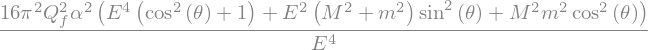

In [12]:
# Calculate spin averaged matrix element 
smel2sum =  mel2sum(ppe, ppE, ppf, ppF, showElements=True)
mel2av = (spin_average*smel2sum)
mel2avG = sy.simplify(mel2av)
mel2av2G = sy.simplify(mel2avG.subs(dsubs_th).expand())
display("Spin averaged Tfi squared (mel2av2G): ", mel2av2G)

#### Calculate $d\sigma/d\Omega$

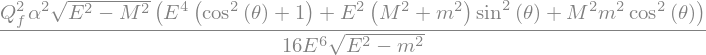

In [13]:
# calculate ds/dOmega in polar form
dsdoG = sy.simplify(fac_dsdo * Kinetic * mel2av2G)
dsdoG

'stotG: '

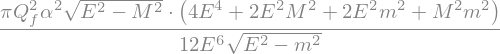

In [14]:
# calculate total cross section
stotG = sy.integrate(dsdoG * sy.sin(theta), (phi,0,2*sy.pi), (theta,0,sy.pi))
stotG = sy.simplify(stotG)
display("stotG: ",stotG)

In [15]:
# Calculate numeric value for cross section at sqrts=10 GeV, E=5 GeV
# convert to nbarn
# result should be around 870 pb
(stotG.subs(dsubs_mu).subs(E,5) * fGeV_to_pbarn).evalf()

### Calculate $d\sigma/dt$

'mel2av2G_ct: '

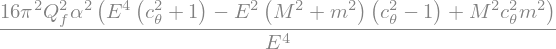

'subs_ct: '

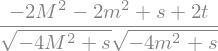

'mel2av2G_st: '

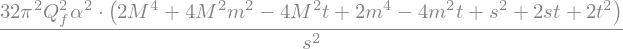

1/(64*pi*s*(-m**2 + s/4))


'dsdtG: '

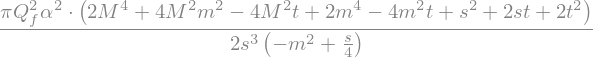

In [16]:
# Calculate dsigma/dt

# convert to sct=cos(theta) terms 
mel2av2G_ct = to_cos(mel2av2G,theta, sct, True)
display("mel2av2G_ct: ",mel2av2G_ct)

# get substitution for sct ->T
rst, sdtdct, subs_ct = tmandel(s,t,sct,m,m,M,M)
display("subs_ct: ",subs_ct)

# replace expression with s, t
mel2av2G_st = sy.simplify(mel2av2G_ct.subs(sct, subs_ct).subs(E**2,s/4))
display("mel2av2G_st: ",mel2av2G_st)

# calculate dsig/dt
print(fac_dsdt.subs(E**2,s/4))
dsdtG = fac_dsdt.subs(E**2,s/4) * mel2av2G_st
display("dsdtG: ",dsdtG)

In [17]:
# calculate total cross section
# calculate limits in t (s. PDG2022, chap 49 Kinematics, eq. 49.35)
# since t is negative the lower limit is t1 and the upper limit t0
def ftlimit(s,m1,m2,m3,m4):
    E1cm = (s + m1**2 - m2**2) /2 /sy.sqrt(s)
    E2cm = (s + m2**2 - m1**2) /2 /sy.sqrt(s)
    E3cm = (s + m3**2 - m4**2) /2 /sy.sqrt(s)
    E4cm = (s + m4**2 - m3**2) /2 /sy.sqrt(s)
    p1cm = sy.sqrt(E1cm**2 - m1**2) 
    p3cm = sy.sqrt(E3cm**2 - m3**2) 
    #print("E1cm: ",E1cm)
    #print("E3cm: ",E3cm)
    #print("p1cm: ",p1cm)
    #print("p3cm: ",p3cm)    
    t0 = (m1**2 -m3**2 - m2**2 + m4**2)**2 /4 /s  - (p1cm - p3cm)**2
    t1 = (m1**2 -m3**2 - m2**2 + m4**2)**2 /4 /s  - (p1cm + p3cm)**2 
    return sy.simplify(t0), sy.simplify(t1)

'Lower limit in t: '

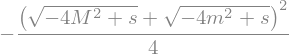

'Upper limit in t: '

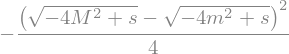

'stotG_st: '

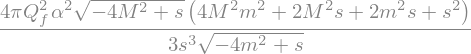

In [18]:
# Calculate stot

# get limits in t
t0,t1 = ftlimit(s,m,m,M,M)
display("Lower limit in t: ", t1)
display("Upper limit in t: ", t0)

# Calculate stot
stotG_st = sy.integrate(dsdtG, (t,t1,t0))
stotG_st = sy.simplify(stotG_st)
display("stotG_st: ",stotG_st)

In [19]:
# Calculate numeric value for stotG_st at sqrt(s) = 10 GeV
# sd/dt includes integration over phi 
# result should be 869 pb
stotG_st_num = (stotG_st.subs(dsubs_mu).subs(s,100) * fGeV_to_pbarn).evalf()
display("stotG_st_num: ",stotG_st_num)

'stotG_st_num: '

### Plots

#### Plot $\frac{d\sigma}{d\cos\theta}$  for $f=\mu$

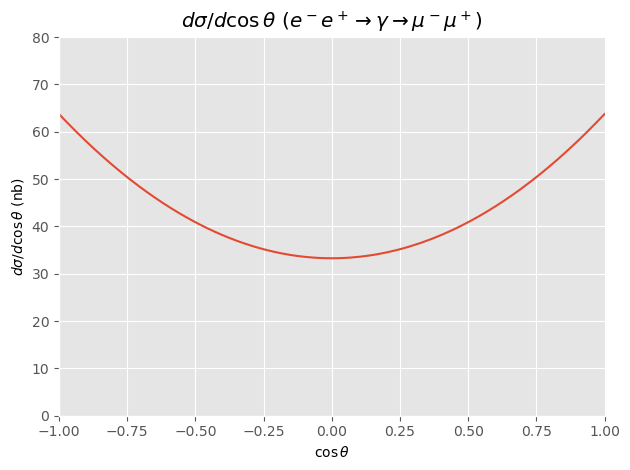

In [20]:
# get plotable stot for e- e+ --> mu- mu+
Ebeam = 0.5 # GeV
fdsdoG = 2*sy.pi*fGeV_to_nbarn * dsdoG.subs(dsubs_mu).subs(E,Ebeam).evalf()
dsdo_sct = utsm.to_cos(fdsdoG, theta, sct, True)
pG=sy.plot(dsdo_sct, (sct, -1, 1), 
                    title=r"$d\sigma/d\cos\theta~(e^- e^+ \rightarrow \gamma \rightarrow \mu^- \mu^+)$",
                    #yscale="linear",
                    #xscale='linear',
                    #ymin = 0,
                    #ymax = 200,
                    xlim=[-1,1],  # limit range of x-axis in the plot
                    ylim=[0,80], # limit range of y-axis in the plot
                    axis_center=(-1,0),
                    #autoscale = True,
                    #size=(10,10),
                    ylabel=r"$d\sigma/d\cos\theta$ (nb)",
                    xlabel=r"$\cos \theta} $")

#### Plot $\sigma_{tot}$  for $f=\mu$

0.869002625609452 pb at E=5 GeV


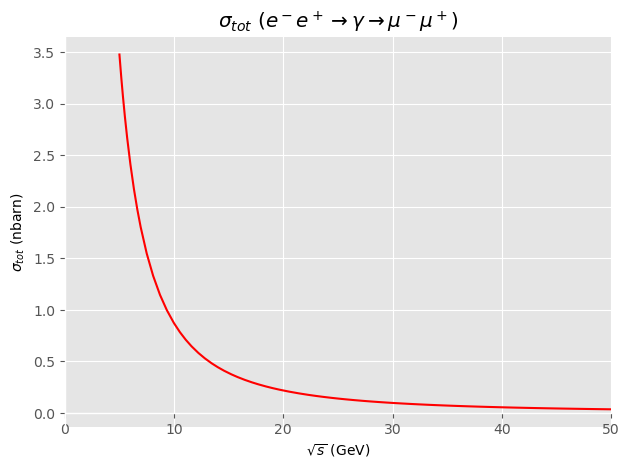

In [21]:
# get plotable stot for e- e+ --> mu- mu+
fstotG = fGeV_to_nbarn*stotG.subs(dsubs_mu).evalf()
print(fstotG.subs(E,5),"pb at E=5 GeV")

sy.plotting.plot(fstotG.subs(E,sqrts/2), (sqrts, 5, 50),
                autoscale=True,
                axis_center=(0,0),
                xlim = (0,50),
                line_color="red",
                title=r"$\sigma_{tot}~(e^- e^+ \rightarrow \gamma \rightarrow \mu^- \mu^+)$",
                yscale=r"linear",
                ylabel=r"$\sigma_{tot}$ (nbarn)",
                xlabel=r"$\sqrt{s}$ (GeV)")

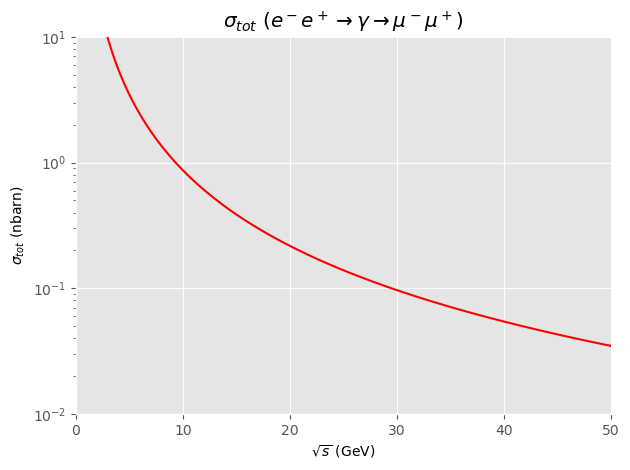

In [22]:
# log plot
sy.plotting.plot(fstotG.subs(E,sqrts/2), (sqrts, 1, 50),
                autoscale=True,
                axis_center=(0,1e-2),
                xlim = (0,50),
                ylim = (1e-2,10),
                line_color="red",
                title=r"$\sigma_{tot}~(e^- e^+ \rightarrow \gamma \rightarrow \mu^- \mu^+)$",
                yscale=r"log",
                ylabel=r"$\sigma_{tot}$ (nbarn)",
                xlabel=r"$\sqrt{s}$ (GeV)")

# Compare with formula in the book 

### Compare with book


'dsdt_book: '

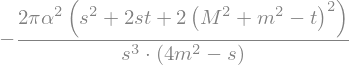

'dsdtG: '

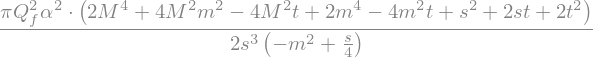

'check equality: '

In [23]:
# replace expression with s, t
# 1) dsdt from the book, e.q. 3.71
t0 = t-m**2-M**2
A = 1 + 2*t0**2/s**2 + 2*t/s
dsdt_book = sy.simplify(2*sy.pi*alpha**2 * A / s**2 / (1-4*m**2/s))
display("dsdt_book: ",dsdt_book)

# 2) this calculation 
display("dsdtG: ",dsdtG)

display("check equality: ")
sy.simplify((dsdt_book-dsdtG).subs(Qf,-1).expand())


'msumnew: '

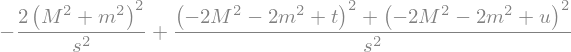

'dsdt_new: '

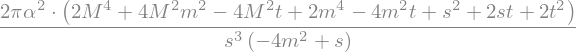

'check equality: dsdt_book - dsdt_new'

In [28]:
# alternative representation
# 3) new replacement for spin averaged M squared: 2*e^4*(t1**2 + u1**2)/s**2  - 2*(M**2+m**2)**2/s**2
t1 = t-2*m**2-2*M**2
u1 = u-2*m**2-2*M**2
msumnew = ((t1**2+u1**2)/s**2 - 2*(M**2+m**2)**2/s**2)
display("msumnew: ",msumnew)
msumnew_st = (msumnew.subs(u,-s-t+2*m**2+2*M**2)).expand()
dsdt_new = sy.simplify(2*sy.pi*alpha**2 * msumnew_st / s**2 / (1-4*m**2/s))
display("dsdt_new: ",dsdt_new)

# 
r2 = sy.simplify((dsdt_book-dsdt_new).expand())
display("check equality: dsdt_book - dsdt_new",r2)

# Conclusion

There are several ways to write the spin averaged matrix element for $e^- e^+ \rightarrow \mu^- \mu^+$

1. Formula in the book

$$\overline{\sum}\vert T_{fi}\vert^2 = 2e^4 ~\frac{2t_0^2+s^2+2ts}{s^2} $$
with $t_0 -m^2-M^2

2. Alternative (similar to massless formula)
$$\overline{\sum}\vert T_{fi}\vert^2 = 2e^4 ~\frac{t_1^2+u_1^2-2(m^2+M^2)^2}{s^2}$$
with $t_1 = t - 2(m^2+M^2)$ and $u_1 = u - 2(m^2+M^2)$